In [26]:
import glob
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
import ast

In [27]:
os.getcwd()
data_path='data\\out\\predictive'
PATH=os.path.join(os.getcwd(), data_path)

In [11]:
def read_data_from_folder(folder_path):
    dfs = pd.DataFrame()
    file_count = 0  # counter for loaded files
    folder_path_add='\\singles'
    folder_path = folder_path + folder_path_add
    # Regex to extract the number after "participant_" and before ".csv"
    # This regex looks for "participant_" followed by one or more digits (\d+)
    # and captures these digits. It expects ".csv" at the end.
    participant_id_regex = re.compile(r'(?:model|participant)_(\d+)\.csv')


    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)

            # Extract model_id from filename using regex
            match = participant_id_regex.search(filename)
            if match:
                model_id = int(match.group(1)) # Convert the captured digits to an integer
                df['model_id'] = model_id # Add the model_id column
            else:
                # Handle cases where the filename doesn't match the expected format
                print(f"Warning: Could not extract model_id from filename: {filename}")
                df['model_id'] = None # Or some other indicator of missing ID

            dfs = pd.concat([dfs, df], ignore_index=True)
            file_count += 1  # increment counter

    print(f"{file_count} CSV file(s) loaded.")
    return dfs

In [12]:
def load_models(base_path="predictive"):
    """
    Load one CSV per model folder and create separate DataFrame variables
    named <model_name>_df in the global namespace.
    
    Parameters
    ----------
    base_path : str
        Path to the 'predictive' folder.
    """
    for model_name in os.listdir(base_path):
        model_path = os.path.join(base_path, model_name)
        #print(f"Loading model: {model_name} from {model_path}")
        
        if os.path.isdir(model_path):
            # Read data from the model folder
            df = read_data_from_folder(model_path)
            #if model name has - in its name make it underscore
            model_name = model_name.replace("-", "_")
            globals()[f"{model_name}_df"] = df
            print(f"Loaded {model_name}_df with shape {df.shape}")


In [13]:
load_models(base_path=PATH)

32 CSV file(s) loaded.
Loaded centaur_70B_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_70B_last_trial_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_70B_last_trial_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_70B_no_reward_without_rewards_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_70B_no_reward_without_rewards_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_70B_without_task_prompt_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_70B_without_task_prompt_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_70B_without_task_prompt_without_rewards_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_70B_without_task_prompt_without_rewards_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_70B_zero_shot_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_70B_zero_shot_df with shape (3200, 9)
32 CSV file(s) loaded.
Loaded centaur_8B_df with shape (3200, 9)
32 

In [14]:
def agreement_df(df):
    """
    Create a DataFrame with the agreement between model predictions and actual choices.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing model predictions and actual choices.
        
    Returns
    -------
    pd.DataFrame
        DataFrame with columns 'model_id', 'trial', 'model_choice', 'human_choice', 'agreement'.
    """
    trial_columns = 'trial' if 'trial' in df.columns else 'trial_num'
    agreement = df[['model_id', trial_columns, 'model_choice', 'human_choice']].copy()
    agreement['agreement'] = agreement['model_choice'] == agreement['human_choice']
    agreement = agreement[agreement['agreement'] == True]
    return agreement

In [15]:
centaur_8B_df_agreement = agreement_df(centaur_8B_df)

In [16]:
centaur_8B_last_trial_df_agreement = agreement_df(centaur_8B_last_trial_df)
centaur_8B_without_task_prompt_df_agreement = agreement_df(centaur_8B_without_task_prompt_df)
centaur_70B_zero_shot_df_agreement = agreement_df(centaur_70B_zero_shot_df)

In [17]:
centaur_70B_df_agreement = agreement_df(centaur_70B_df)
centaur_70B_zero_shot_df_agreement = agreement_df(centaur_70B_zero_shot_df)
centaur_70B_last_trial_df_agreement = agreement_df(centaur_70B_last_trial_df)
centaur_70B_without_task_prompt_df_agreement = agreement_df(centaur_70B_without_task_prompt_df)

In [18]:
def calculate_log_likelihood_stats(df, column_name='log_likelihood'):
    """
    Calculates the mean and standard error of the mean (SEM)
    for the specified column in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame containing a
                           'log_likelihood' column.

    Returns:
        tuple: A tuple containing the mean log-likelihood and the SEM.
    """
    # Drop missing log-likelihoods (NaN)
    valid_ll = df[column_name].dropna()

    # Compute mean and SEM
    if not valid_ll.empty:
        mean_ll = valid_ll.mean()
        sem_ll = valid_ll.std(ddof=1) / np.sqrt(len(valid_ll))
        return mean_ll, sem_ll
    else:
        return None, None

In [19]:
mean_ll_centaur_8b, sem_ll_centaur_8b = calculate_log_likelihood_stats(centaur_8B_df)
mean_ll_centaur_8b_last_trial, sem_ll_centaur_8b_last_trial = calculate_log_likelihood_stats(centaur_8B_last_trial_df)
mean_ll_centaur_8b_without_task_prompt, sem_ll_centaur_8b_without_task_prompt = calculate_log_likelihood_stats(centaur_8B_without_task_prompt_df)
mean_ll_centaur_8b_zero_shot, sem_ll_centaur_8b_zero_shot = calculate_log_likelihood_stats(centaur_8B_zero_shot_df)
mean_ll_centaur_8b_without_task_prompt_no_rewards, sem_ll_centaur_8b_without_task_prompt_no_rewards = calculate_log_likelihood_stats(centaur_8B_without_task_prompt_without_rewards_df)
mean_ll_centaur_8b_no_rewards, sem_ll_centaur_8b_no_rewards = calculate_log_likelihood_stats(centaur_8B_no_reward_without_rewards_df)


In [20]:
mean_ll_centaur_70b, sem_ll_centaur_70b = calculate_log_likelihood_stats(centaur_70B_df)
mean_ll_centaur_70b_last_trial, sem_ll_centaur_70b_last_trial = calculate_log_likelihood_stats(centaur_70B_last_trial_df)
mean_ll_centaur_70b_without_task_prompt, sem_ll_centaur_70b_without_task_prompt = calculate_log_likelihood_stats(centaur_70B_without_task_prompt_df)
mean_ll_centaur_70b_zero_shot, sem_ll_centaur_70b_zero_shot = calculate_log_likelihood_stats(centaur_70B_zero_shot_df)
mean_ll_centaur_70b_without_task_prompt_no_rewards, sem_ll_centaur_70b_without_task_prompt_no_rewards = calculate_log_likelihood_stats(centaur_70B_without_task_prompt_without_rewards_df)  
mean_ll_centaur_70b_no_rewards, sem_ll_centaur_70b_no_rewards = calculate_log_likelihood_stats(centaur_70B_no_reward_without_rewards_df)

In [21]:
plt.rcParams.update({
    'font.size': 22,        # everything (titles, labels, ticks, legend) gets bigger
    'axes.titlesize': 30,   # override just titles if you want
    'axes.labelsize': 24,   # axis labels
    'xtick.labelsize': 26,  # x-tick labels
    'ytick.labelsize': 28,  # y-tick labels
    'legend.fontsize': 22 #  # legend text
})

In [28]:
def plot_loglikelihood_bars(mu_8b=None, mu_70b=None, sd_8b=None, sd_70b=None,
                            family_labels=None,
                            variant_labels=['8B', '70B'],
                            colors=['#E69F00', '#D55E00'],
                            figsize=(24, 8)):

    # Ensure we have valid family labels
    if family_labels is None or len(family_labels) == 0:
        family_labels = [f'Family {i+1}' for i in range(len(mu_8b))]
    
    # Make sure we have the right number of family labels
    n_families = min(len(mu_8b), len(mu_70b))
    if len(family_labels) != n_families:
        family_labels = family_labels[:n_families] if len(family_labels) > n_families else family_labels + [f'Family {i+1}' for i in range(len(family_labels), n_families)]
    
    n_variants = len(variant_labels)
    
    # Dynamically create the means array
    means = np.zeros((n_families, n_variants))
    for i in range(n_families):
        means[i, 0] = -mu_8b[i] if i < len(mu_8b) else 0
        means[i, 1] = -mu_70b[i] if i < len(mu_70b) else 0
    
    # Dynamically create the errors array
    errs = np.zeros((n_families, n_variants))
    for i in range(n_families):
        errs[i, 0] = sd_8b[i] if i < len(sd_8b) else 0
        errs[i, 1] = sd_70b[i] if i < len(sd_70b) else 0

    # Bar placement
    w = 0.4
    x = np.arange(n_families)

    fig, ax = plt.subplots(figsize=figsize)

    # 🔹 Shade the "full-history" category (first group) if it exists
    if n_families > 0:
        ax.axvspan(-0.3, 0.7, color="lightgrey", alpha=0.7, zorder=0)

    for i in range(n_variants):
        ax.bar(x + i*w, means[:, i], w,
               yerr=errs[:, i], capsize=5,
               color=colors[i], label=variant_labels[i],
               edgecolor='black', linewidth=0.3,zorder=1)

    # Annotate values
    for i in range(n_families):
        for j in range(n_variants):
            height = means[i, j]
            ax.annotate(f'{height:.4f}',
                        xy=(i + j*w, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    # Chance line
    chance_nll = -np.log(0.5)
    ax.axhline(chance_nll, ls='--', c='grey', lw=1.2)
    ax.text(n_families-0.3, chance_nll, 'Random guessing',
            va='bottom', ha='right', fontsize=14)

    # X-axis labels
    ax.set_xticks(x + w/2)
    ax.set_xticklabels(family_labels)

    # Axis labels
    ax.set_ylabel('Negative Log-Likelihood (NLL)', fontsize=14)
    ax.legend(title="Centaur", loc='upper left', ncol=1)

    # Styling
    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(False)
    ax.margins(x=0.05)

    plt.tight_layout()
    return fig

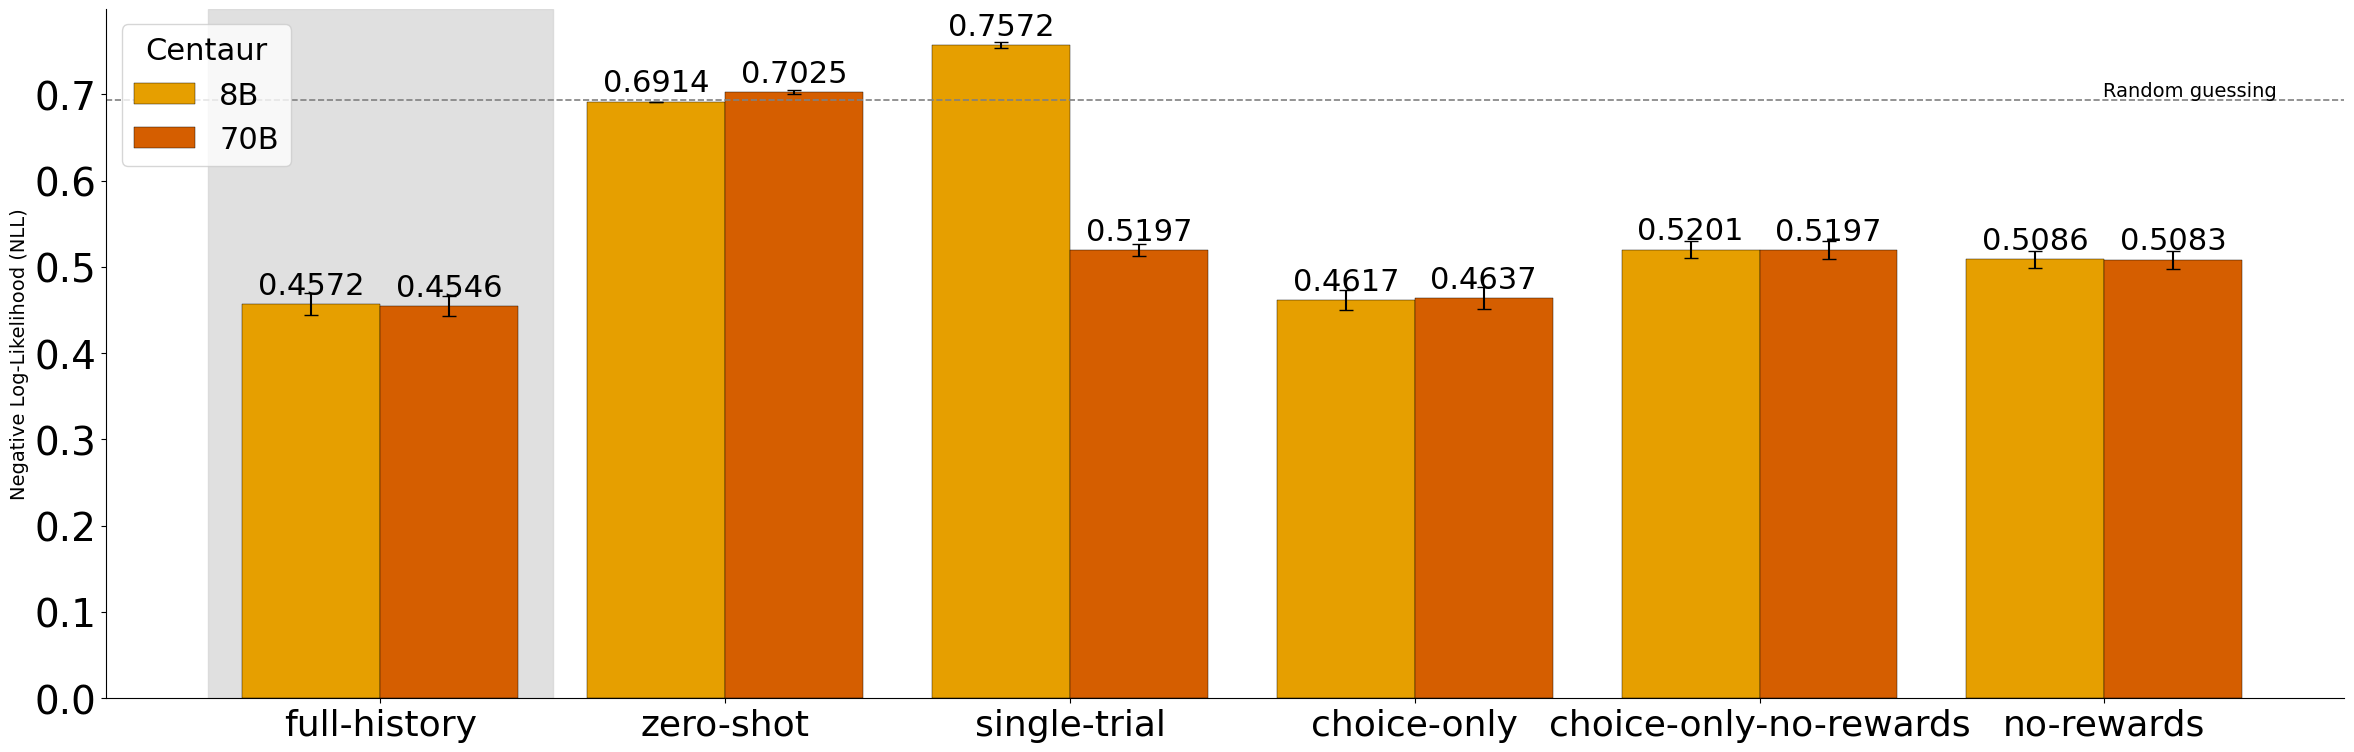

In [23]:
fig=plot_loglikelihood_bars(
    mu_8b=[mean_ll_centaur_8b, mean_ll_centaur_8b_zero_shot, mean_ll_centaur_8b_last_trial, mean_ll_centaur_8b_without_task_prompt, mean_ll_centaur_8b_without_task_prompt_no_rewards, mean_ll_centaur_8b_no_rewards],
    mu_70b=[mean_ll_centaur_70b, mean_ll_centaur_70b_zero_shot, mean_ll_centaur_70b_last_trial, mean_ll_centaur_70b_without_task_prompt, mean_ll_centaur_70b_without_task_prompt_no_rewards,mean_ll_centaur_70b_no_rewards],
    sd_8b=[sem_ll_centaur_8b, sem_ll_centaur_8b_zero_shot, sem_ll_centaur_8b_last_trial, sem_ll_centaur_8b_without_task_prompt, sem_ll_centaur_8b_without_task_prompt_no_rewards, sem_ll_centaur_8b_no_rewards],
    sd_70b=[sem_ll_centaur_70b, sem_ll_centaur_70b_zero_shot, sem_ll_centaur_70b_last_trial, sem_ll_centaur_70b_without_task_prompt, sem_ll_centaur_70b_without_task_prompt_no_rewards, sem_ll_centaur_70b_no_rewards],
    family_labels=['full-history', 'zero-shot', 'single-trial', 'choice-only', 'choice-only-no-rewards','no-rewards'],
)

In [29]:
fig=plot_loglikelihood_bars(
    mu_70b=[mean_ll_centaur_70b, mean_ll_centaur_70b_no_rewards],
    sd_70b=[sem_ll_centaur_70b, sem_ll_centaur_70b_no_rewards],
    family_labels=['initial','partial information'],
    figsize=(12,8)
)

TypeError: object of type 'NoneType' has no len()

In [51]:
mean_ll_base=centaur_70B_df.groupby('model_id')['log_likelihood'].mean()
mean_ll_partial_information=centaur_70B_no_reward_without_rewards_df.groupby('model_id')['log_likelihood'].mean()

In [52]:
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(mean_ll_base, mean_ll_partial_information)
print(f"t = {t_stat:.2f}, p = {p_value:.4f}")


t = 8.71, p = 0.0000


In [53]:
diff = mean_ll_base - mean_ll_partial_information
cohen_d = diff.mean() / diff.std(ddof=1)
print(f"Cohen's d = {cohen_d:.2f}")


Cohen's d = 1.54


In [62]:
mean_ll_base_trial=centaur_70B_df.groupby('trial_num')['log_likelihood'].mean()
mean_ll_partial_trial=centaur_70B_df.groupby('trial_num')['log_likelihood'].mean()

In [64]:
t_stat, p_value = ttest_rel(mean_ll_base_trial, mean_ll_partial_trial)
print(f"t = {t_stat:.2f}, p = {p_value:.4f}")

t = nan, p = nan


In [65]:
mean_ll_partial_trial = centaur_70B_no_reward_without_rewards_df.groupby('trial_num')['log_likelihood'].mean()
t_stat, p_value = ttest_rel(mean_ll_base_trial, mean_ll_partial_trial)
print(f"t = {t_stat:.2f}, p = {p_value:.4f}")

t = 5.27, p = 0.0000


In [66]:
cohen_d = (mean_ll_base_trial - mean_ll_partial_trial).mean() / (mean_ll_base_trial - mean_ll_partial_trial).std(ddof=1)
print(f"Cohen's d = {cohen_d:.2f}")

Cohen's d = 0.53


In [16]:
mean_ll_centaur_70b_without_task_prompt_no_rewards

-0.5196933746337891

In [17]:
mean_ll_centaur_70b_last_trial

-0.519744873046875

In [18]:
fig.savefig('figures/predictive_reversal_learning_loglikelihood_bars_4.png', dpi=600, bbox_inches='tight')

In [19]:
def extract_probs(top2_tokens):
    prob_u = prob_p = None
    for entry in top2_tokens:
        if entry['token'] == 'U':
            prob_u = entry['prob']
        elif entry['token'] == 'P':
            prob_p = entry['prob']
    return pd.Series({'token_U_prob': prob_u, 'token_P_prob': prob_p})

In [20]:
centaur_70B_df['top2_tokens']=centaur_70B_df['top2_tokens'].apply(ast.literal_eval)

In [21]:
centaur_70B_last_trial_df['top2_tokens']=centaur_70B_last_trial_df['top2_tokens'].apply(ast.literal_eval)
centaur_70B_without_task_prompt_df['top2_tokens']=centaur_70B_without_task_prompt_df['top2_tokens'].apply(ast.literal_eval)
centaur_70B_without_task_prompt_without_rewards_df['top2_tokens']=centaur_70B_without_task_prompt_without_rewards_df['top2_tokens'].apply(ast.literal_eval)
centaur_70B_zero_shot_df['top2_tokens']=centaur_70B_zero_shot_df['top2_tokens'].apply(ast.literal_eval)

In [22]:
centaur_8B_df['top2_tokens']=centaur_8B_df['top2_tokens'].apply(ast.literal_eval)
centaur_8B_last_trial_df['top2_tokens']=centaur_8B_last_trial_df['top2_tokens'].apply(ast.literal_eval)
centaur_8B_without_task_prompt_df['top2_tokens']=centaur_8B_without_task_prompt_df['top2_tokens'].apply(ast.literal_eval)
centaur_8B_without_task_prompt_without_rewards_df['top2_tokens']=centaur_8B_without_task_prompt_without_rewards_df['top2_tokens'].apply(ast.literal_eval)
centaur_8B_zero_shot_df['top2_tokens']=centaur_8B_zero_shot_df['top2_tokens'].apply(ast.literal_eval)

In [23]:
centaur_70B_df[['token_U_prob', 'token_P_prob']] = centaur_70B_df['top2_tokens'].apply(extract_probs)
centaur_70B_zero_shot_df[['token_U_prob', 'token_P_prob']] = centaur_70B_zero_shot_df['top2_tokens'].apply(extract_probs)
centaur_70B_without_task_prompt_df[['token_U_prob', 'token_P_prob']] = centaur_70B_without_task_prompt_df['top2_tokens'].apply(extract_probs)
centaur_70B_without_task_prompt_without_rewards_df[['token_U_prob', 'token_P_prob']] = centaur_70B_without_task_prompt_without_rewards_df['top2_tokens'].apply(extract_probs)
centaur_70B_last_trial_df[['token_U_prob', 'token_P_prob']] = centaur_70B_last_trial_df['top2_tokens'].apply(extract_probs)

In [24]:
# Group by model and human choices to get count matrix
df_2dhist = pd.DataFrame({
    model_choice: grp['human_choice'].value_counts()
    for model_choice, grp in df_llama.groupby('model_choice')
}).fillna(0).astype(int)

# Sort for consistent display
df_2dhist = df_2dhist.sort_index(axis=0).sort_index(axis=1)

# Plot
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    df_2dhist,
    annot=True, fmt="d", cmap='viridis',
    cbar_kws={'label': 'Count'},
    linewidths=0.5, linecolor='white',
    square=True
)

# Labels
ax.set_title("Heatmap of Human vs. Model Choices(Llama-8b)", fontsize=14, pad=15)
ax.set_xlabel("Model Choice", fontsize=12)
ax.set_ylabel("Human Choice", fontsize=12)

# Tick styling
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

plt.tight_layout()
plt.show()


NameError: name 'df_llama' is not defined

In [ ]:

# Group by model and human choices to get count matrix
df_2dhist = pd.DataFrame({
    model_choice: grp['human_choice'].value_counts()
    for model_choice, grp in df_llama_70b.groupby('model_choice')
}).fillna(0).astype(int)

# Sort for consistent display
df_2dhist = df_2dhist.sort_index(axis=0).sort_index(axis=1)

# Plot
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    df_2dhist,
    annot=True, fmt="d", cmap='viridis',
    cbar_kws={'label': 'Count'},
    linewidths=0.5, linecolor='white',
    square=True
)

# Labels
ax.set_title("Heatmap of Human vs. Model Choices(Centaur-8b)", fontsize=14, pad=15)
ax.set_xlabel("Model Choice", fontsize=12)
ax.set_ylabel("Human Choice", fontsize=12)

# Tick styling
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))

# Plot distribution for Llama 70B
sns.histplot(df_llama_70b['token_U_prob'], bins=30, kde=True, color='blue', label='LLaMA 70B', stat='density')

# Plot distribution for Centaur 70B
sns.histplot(df_centaur_70b['token_U_prob'], bins=30, kde=True, color='orange', label='Centaur 70B', stat='density')

plt.title('Distribution of Token "U" Probabilities')
plt.xlabel('Probability of Token "U"')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

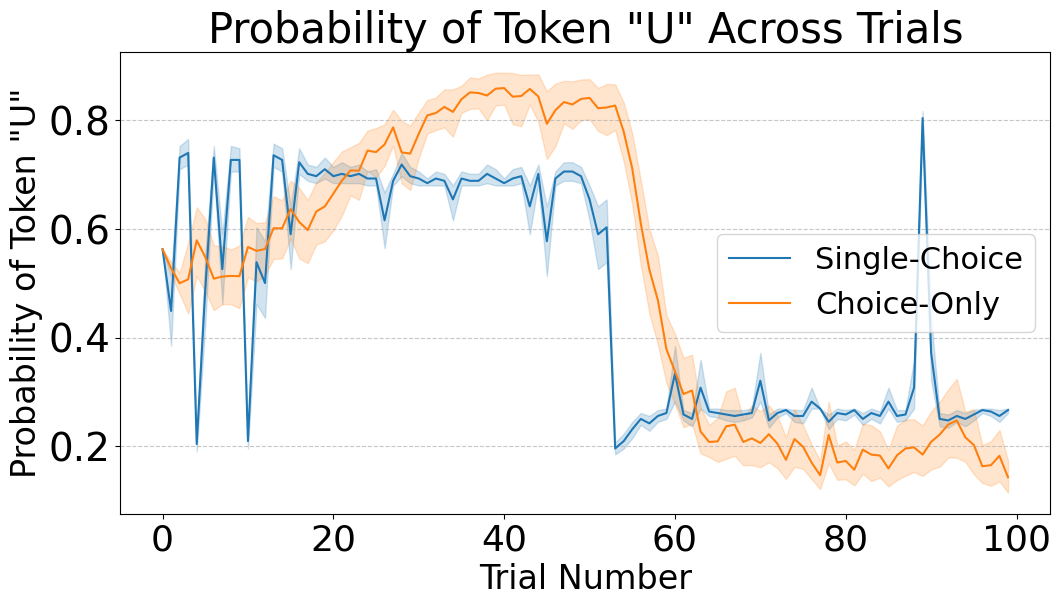

In [25]:
plt.figure(figsize=(12, 6))

# Plot probability of 'U' across trials for Llama 70B
sns.lineplot(data=centaur_70B_last_trial_df, x='trial_num', y='token_U_prob', label='Single-Choice')

# Plot probability of 'U' across trials for Centaur 70B
sns.lineplot(data=centaur_70B_without_task_prompt_without_rewards_df, x='trial_num', y='token_U_prob', label='Choice-Only')

plt.title('Probability of Token "U" Across Trials')
plt.xlabel('Trial Number')
plt.ylabel('Probability of Token "U"')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()